In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/FrydaOviedo/Fisica_Computacional/main/Actividad1/Datos_diarios.txt'
# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251'
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha','Precip','Evap','Tmax','Tmin',]
df_tkt = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') 

# Hacemos una copia de trabajo y preservamos el dataframe original
df_tkt0 = df_tkt.copy()

# Cambiamos la palabra nulo por un vacío y verificamos
str_Nulo = 'Nulo'
df_tkt1 = df_tkt0.replace(to_replace=str_Nulo, value='', regex=True)

# Convertimos los valores de las variables ambientales a números flotantes y verificamos 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_tkt1[cols] = pd.to_numeric(df_tkt0[cols], errors='coerce')

# Definimos un nuevo dataframe por si hay que regresarse
df_tkt2 = df_tkt1.copy()
df_tkt2['Fecha'].head()

# Se convierte el objeto Fecha a variable fecha que python reconoce
df_tkt2['Fecha'] = pd.to_datetime(df_tkt2['Fecha'], dayfirst=True).copy()

# Añadimos dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_tkt2['Año'] = df_tkt2['Fecha'].dt.year
df_tkt2['Mes'] = df_tkt2['Fecha'].dt.month

# Hacemos una copia del trabajo y es con el que trabajaremos para el análisis de datos
df_meteotkt = df_tkt2.copy()
df_meteotkt.info()
print(df_meteotkt.head())
print(df_meteotkt.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20904 entries, 0 to 20903
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   20904 non-null  datetime64[ns]
 1   Precip  20856 non-null  float64       
 2   Evap    9815 non-null   float64       
 3   Tmax    20790 non-null  float64       
 4   Tmin    20801 non-null  float64       
 5   Año     20904 non-null  int64         
 6   Mes     20904 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.1 MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1953-09-09     0.0   NaN  39.5   NaN  1953    9
1 1953-09-10     0.0   NaN  41.0  35.0  1953    9
2 1953-09-11     0.0   NaN  38.0  26.0  1953    9
3 1953-09-12     0.0   NaN  36.0  26.0  1953    9
4 1953-09-13     0.0   NaN  35.0  25.0  1953    9
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
20899 2012-11-26     0.0   NaN  26.0  19.0  2012   11
20900 2012-11-27   

In [3]:
# Eliminamos la columna de Mes(numérico) y agregamos Mes(caractéres)
df_meteotkt.drop('Mes', axis=1, inplace=True)
df_meteotkt['Mes'] = df_meteotkt['Fecha'].dt.strftime('%b')
df_meteotkt.info()
print(df_meteotkt.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20904 entries, 0 to 20903
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   20904 non-null  datetime64[ns]
 1   Precip  20856 non-null  float64       
 2   Evap    9815 non-null   float64       
 3   Tmax    20790 non-null  float64       
 4   Tmin    20801 non-null  float64       
 5   Año     20904 non-null  int64         
 6   Mes     20904 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.1+ MB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1953-09-09     0.0   NaN  39.5   NaN  1953  Sep
1 1953-09-10     0.0   NaN  41.0  35.0  1953  Sep
2 1953-09-11     0.0   NaN  38.0  26.0  1953  Sep
3 1953-09-12     0.0   NaN  36.0  26.0  1953  Sep
4 1953-09-13     0.0   NaN  35.0  25.0  1953  Sep


Actividad 1. Análisis Exploratorio de Datos

In [4]:
# Forma y dimensiones del DataFrame
print(df_meteotkt.shape)

# Tipo de datos de las columnas
print(df_meteotkt.dtypes)

# Despliegue de renglones para visualizar la estructura del DataFrame
print(df_meteotkt.head())
print(df_meteotkt.tail())
print(df_meteotkt.sample(5))

# Información general de la estructura y componentes del DataFrame
print(df_meteotkt.info()) 

# Descripción estádistica de las variables numéricas
print(df_meteotkt.describe())

# Descripción estádistica de las variables categóricas
#df_meteotkt.describe(include='object')

# Suma de valores faltantes
df_meteotkt.isnull().sum()

(20904, 7)
Fecha     datetime64[ns]
Precip           float64
Evap             float64
Tmax             float64
Tmin             float64
Año                int64
Mes               object
dtype: object
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1953-09-09     0.0   NaN  39.5   NaN  1953  Sep
1 1953-09-10     0.0   NaN  41.0  35.0  1953  Sep
2 1953-09-11     0.0   NaN  38.0  26.0  1953  Sep
3 1953-09-12     0.0   NaN  36.0  26.0  1953  Sep
4 1953-09-13     0.0   NaN  35.0  25.0  1953  Sep
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
20899 2012-11-26     0.0   NaN  26.0  19.0  2012  Nov
20900 2012-11-27     0.0   NaN  26.0  17.0  2012  Nov
20901 2012-11-28     0.0   NaN  24.0  18.0  2012  Nov
20902 2012-11-29     0.0   NaN  25.0  17.0  2012  Nov
20903 2012-11-30     0.0   NaN  26.0  17.0  2012  Nov
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
6395  1971-05-29     0.0   4.8  21.0  17.0  1971  May
19611 2009-05-18     0.0   NaN  40.0  14.0  2009  May
17204 2001-09-

Fecha         0
Precip       48
Evap      11089
Tmax        114
Tmin        103
Año           0
Mes           0
dtype: int64

Actividad 2. Histograma y función de densidad
Caso: Precipitación

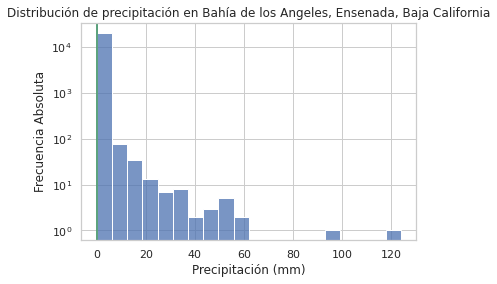

In [6]:
# Elaboracion de histograma de Precipitación con biblioteca Seaborn
sns.set_style("whitegrid")
# Etiquetas de los ejes y título del gráfico
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de precipitación en Bahía de los Angeles, Ensenada, Baja California')

sns.histplot(data=df_meteotkt, x='Precip', bins=20, log_scale=(False,True));

# Definimos las cantidades: Promedio y Mediana
Pmed  = df_meteotkt.Precip.median()
Pprom = df_meteotkt.Precip.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Pmed, color = 'b');
plt.axvline(Pprom, color = 'g');

plt.show()

Caso: evaporación

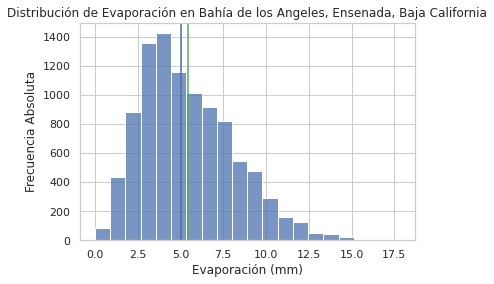

In [8]:
# Elaboracíon de histograma de Evaporación con biblioteca Seaborn
sns.set_style("whitegrid")

sns.histplot(data=df_meteotkt, x='Evap', bins=20);

# Definimos las cantidades: Promedio y Mediana
Emed  = df_meteotkt.Evap.median()
Eprom = df_meteotkt.Evap.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Emed, color = 'b');
plt.axvline(Eprom, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Evaporación (mm)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de Evaporación en Bahía de los Angeles, Ensenada, Baja California')

plt.show()

Caso: Temperatura Máxima

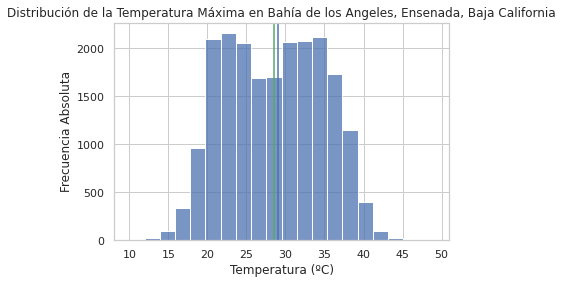

In [9]:
# Elaboracíon de histograma de la Temperatura Máxima con biblioteca Seaborn
sns.set_style("whitegrid")
sns.histplot(data=df_meteotkt, x='Tmax', bins=20);

# Definimos las cantidades: Promedio y Mediana
Tmedx  = df_meteotkt.Tmax.median()
Tpromx = df_meteotkt.Tmax.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Tmedx, color = 'b');
plt.axvline(Tpromx, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la Temperatura Máxima en Bahía de los Angeles, Ensenada, Baja California')

plt.show()


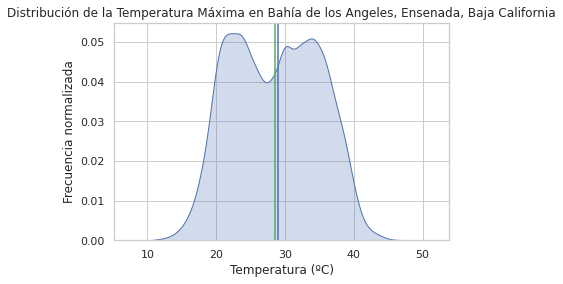

In [10]:

# Gráfica de la función de densidad de probabilidad
sns.set_style('whitegrid')
sns.kdeplot(df_meteotkt.Tmax, fill=True);

# Lineas verticales de promedio y mediana
plt.axvline(Tmedx, color = 'b');
plt.axvline(Tpromx, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la Temperatura Máxima en Bahía de los Angeles, Ensenada, Baja California')

plt.show()


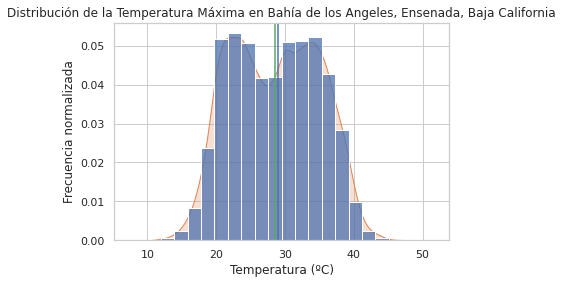

In [11]:

# Sobrepones ambas gráficas
sns.set_style("whitegrid")
sns.histplot(data=df_meteotkt, x='Tmax', bins=20, stat='density');
sns.kdeplot(df_meteotkt.Tmax, fill=True);

# Lineas verticales de promedio y mediana
plt.axvline(Tmedx, color = 'b');
plt.axvline(Tpromx, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la Temperatura Máxima en Bahía de los Angeles, Ensenada, Baja California')

plt.show()

Caso: Temperatura Mínima

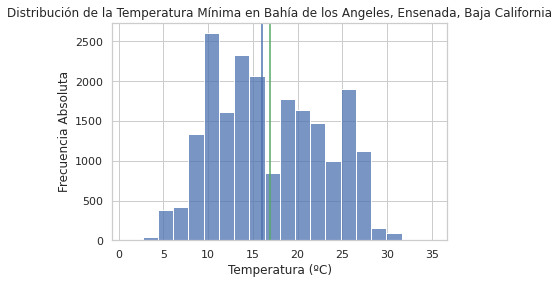

In [12]:

# Elaboracíon de histograma de la Temperatura Mínima con biblioteca Seaborn
sns.set_style("whitegrid")

sns.histplot(data=df_meteotkt, x='Tmin', bins=20);

# Definimos las cantidades: Promedio y Mediana
Tmedn  = df_meteotkt.Tmin.median()
Tpromn = df_meteotkt.Tmin.mean()

# Lineas verticales de promedio y mediana
plt.axvline(Tmedn, color = 'b');
plt.axvline(Tpromn, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de la Temperatura Mínima en Bahía de los Angeles, Ensenada, Baja California')

plt.show()


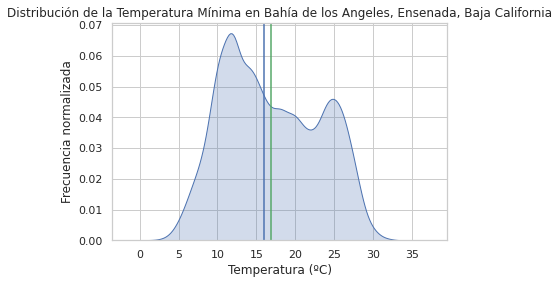

In [13]:
sns.set_style('whitegrid')

sns.kdeplot(df_meteotkt.Tmin, fill=True);

# Lineas verticales de promedio y mediana
plt.axvline(Tmedn, color = 'b');
plt.axvline(Tpromn, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la Temperatura Mínima en Bahía de los Angeles, Ensenada, Baja California')

plt.show()


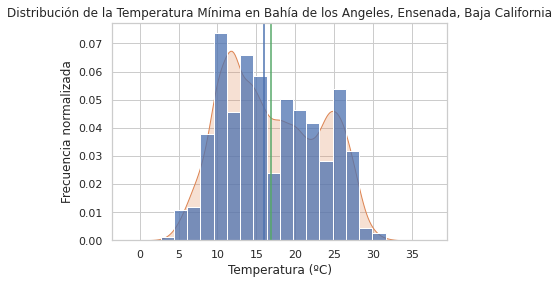

In [14]:

# Sobrepones ambas gráficas
sns.set_style("whitegrid")

sns.histplot(data=df_meteotkt, x='Tmin', bins=20, stat='density');
sns.kdeplot(df_meteotkt.Tmin, fill=True);

# Lineas verticales de promedio y mediana
plt.axvline(Tmedn, color = 'b');
plt.axvline(Tpromn, color = 'g');

# Etiquetas de los ejes y título del gráfico
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frecuencia normalizada')
plt.title('Distribución de la Temperatura Mínima en Bahía de los Angeles, Ensenada, Baja California')

plt.show()


Actividad 3. Gráficas de caja

Caso: Evaporación

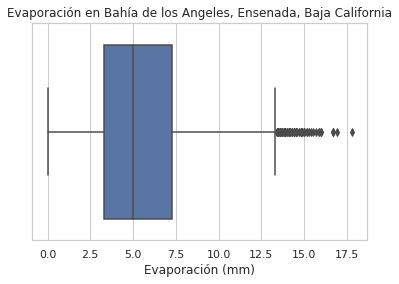

In [15]:
# Gráfica de caja para Evaporación utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteotkt.Evap, data=df_meteotkt, orient='h').set(
    xlabel='Evaporación (mm)', title= 'Evaporación en Bahía de los Angeles, Ensenada, Baja California');

Caso: Temperatura Máxima

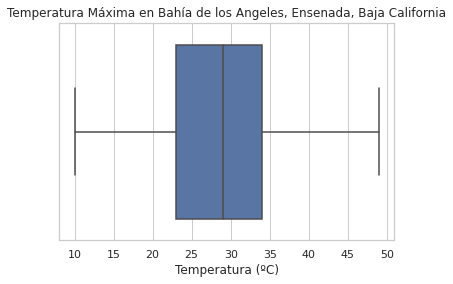

In [16]:
# Gráfica de caja para Temperatura Máxima utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteotkt.Tmax, data=df_meteotkt, orient='h').set(
    xlabel='Temperatura (ºC)', title= 'Temperatura Máxima en Bahía de los Angeles, Ensenada, Baja California');

Caso: Temperatura Mínima

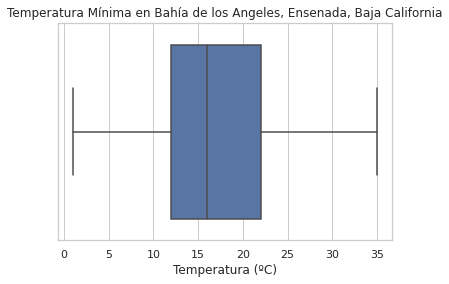

In [17]:
# Gráfica de caja para Temperatura Mínima utilizando Seaborn
sns.set_style('whitegrid')

# Definimos la orientación de la caja y las etiquetas
sns.boxplot(x=df_meteotkt.Tmin, data=df_meteotkt, orient='h').set(
    xlabel='Temperatura (ºC)', title= 'Temperatura Mínima en Bahía de los Angeles, Ensenada, Baja California');

Actividad 4. Gráficas de Barras

In [18]:
# Seleccionamos un conjunto de años de 30 años
df_p30 = df_meteotkt[(df_meteotkt['Año'] >= 1953) & (df_meteotkt['Año'] < 1983)]
df_u30 = df_meteotkt[(df_meteotkt['Año'] >= 1984) & (df_meteotkt['Año'] < 2012)]

Precipitación Promedio por Año



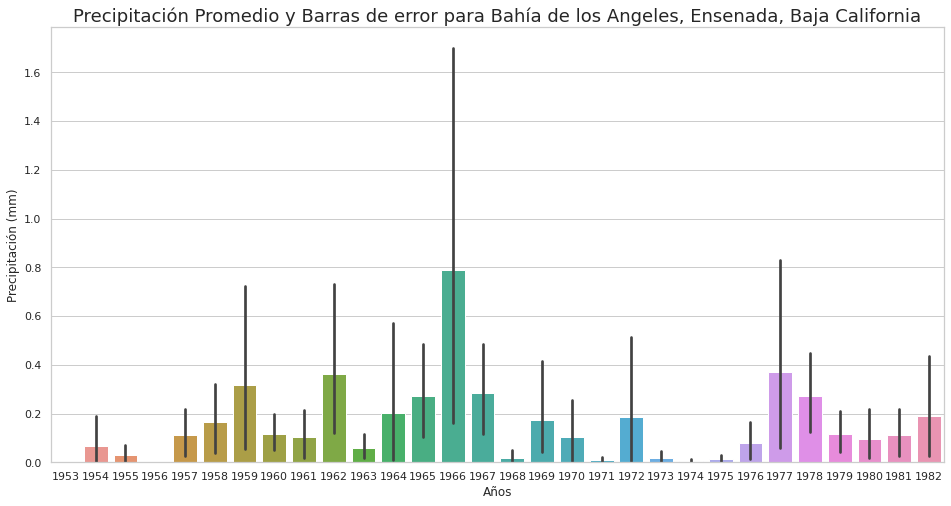

In [19]:
# Gráfica de Precipitación agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.barplot(x='Año', y='Precip', data=df_p30)

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y Barras de error para Bahía de los Angeles, Ensenada, Baja California', fontsize=18)

plt.show()

Precipitación Promedio por Mes

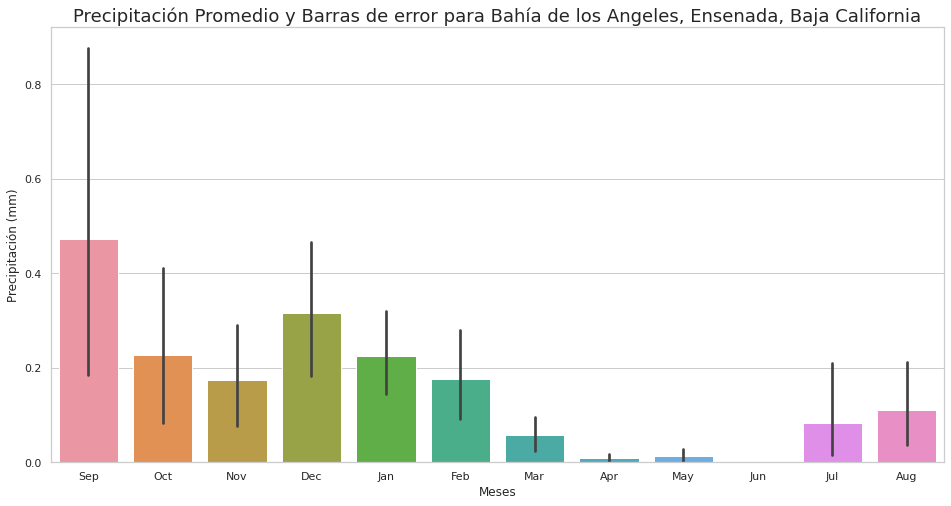

In [20]:
# Gráfica de Precipitación agrupada por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.barplot(x='Mes', y='Precip', data=df_p30)

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y Barras de error para Bahía de los Angeles, Ensenada, Baja California', fontsize=18)

plt.show()

Actividad 5. Gráficas de línea

Precipitación Promedio por Año

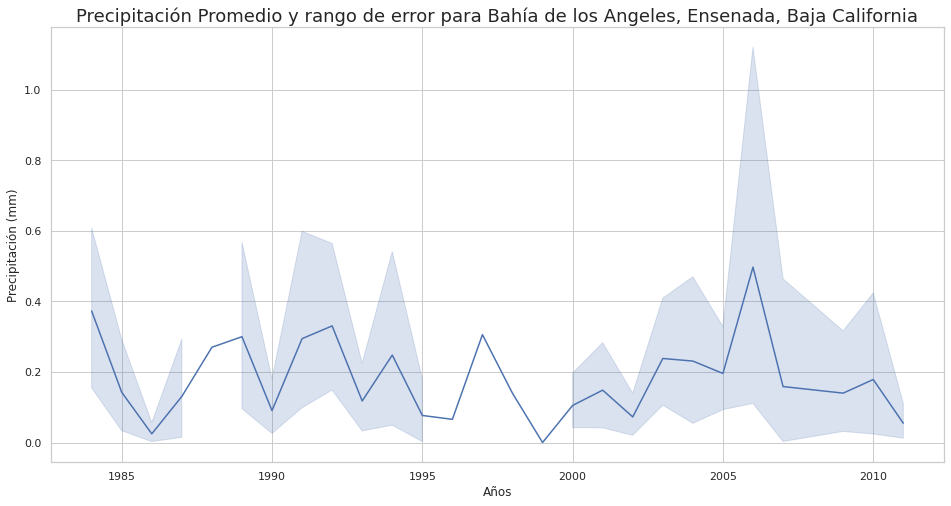

In [21]:
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Precip', data=df_u30)

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Bahía de los Angeles, Ensenada, Baja California', fontsize=18)

plt.show()

Temperatura Máxima y Mínima Promedia por Año

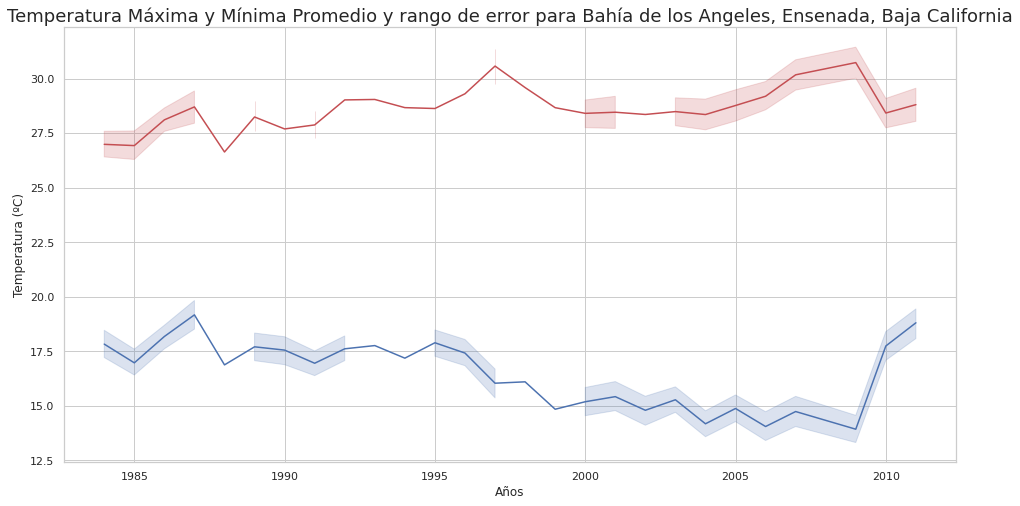

In [22]:
# Gráfica de Precipitación últimos 30 años
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_u30, color='r');
sns.lineplot(x='Año', y='Tmin', data=df_u30);

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Años')
plt.ylabel('Temperatura (ºC)')
plt.title('Temperatura Máxima y Mínima Promedio y rango de error para Bahía de los Angeles, Ensenada, Baja California', fontsize=18)

plt.show()

Actividad 6. Diagramas de cajas

Temperatura Máxima en los últimos 30 años

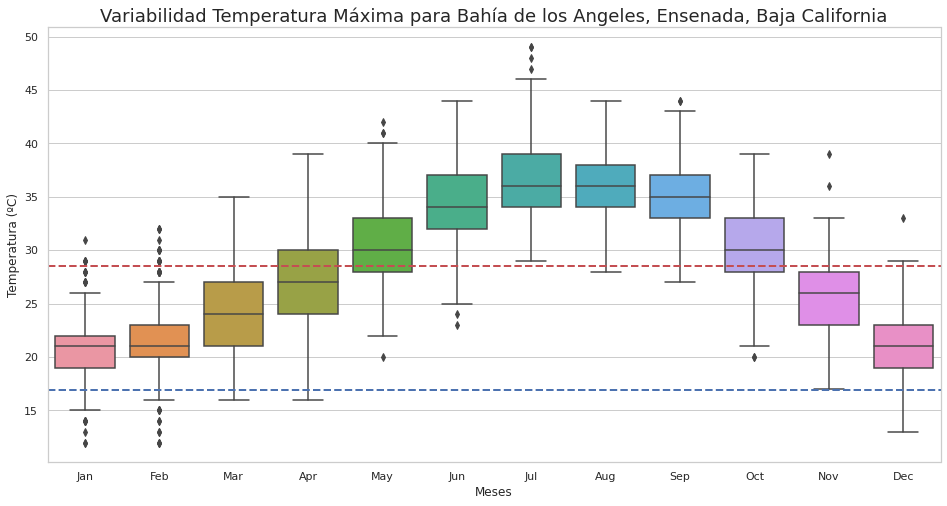

In [23]:
# Gráfica de Temperatura Máxima en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_m=df_meteotkt.Tmax.mean()
Tmin_m=df_meteotkt.Tmin.mean()

# Gráfica de cajas
sns.boxplot(x='Mes', y='Tmax', data=df_u30)

# Líneas de la Temperatura promedio
plt.axhline(Tmax_m, color='r', linestyle='--', linewidth=2);
plt.axhline(Tmin_m, color='b', linestyle='--', linewidth=2);

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad Temperatura Máxima para Bahía de los Angeles, Ensenada, Baja California', fontsize=18)

plt.show()

Temperatura Mínima en los últimos 30 años

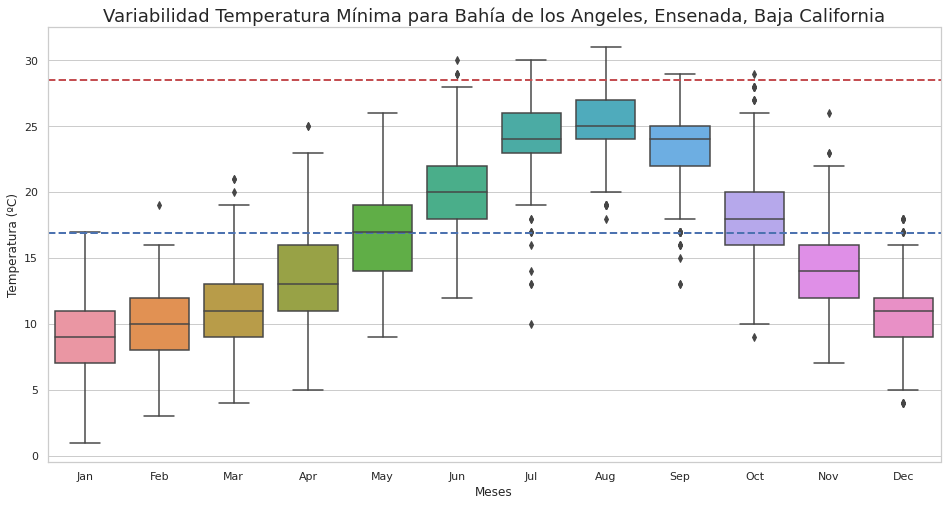

In [24]:
# Gráfica de Temperatura Mínima en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Gráfica de cajas
sns.boxplot(x='Mes', y='Tmin', data=df_u30)

# Líneas de la Temperatura promedio
plt.axhline(Tmax_m, color='r', linestyle='--', linewidth=2);
plt.axhline(Tmin_m, color='b', linestyle='--', linewidth=2);

# Etiquetas de los ejes y título del gráfico, tamaño de letra 18
plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad Temperatura Mínima para Bahía de los Angeles, Ensenada, Baja California', fontsize=18)

plt.show()